목차

0. 데이터 불러오기
1. data description
2. 결측치 이상치
3. feature engineering
4. EDA
5. 모델링

요약 
예?


In [793]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [794]:
%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'  # (Windows 용) 한글 출력을 위한 글꼴 설정
#plt.rcParams['font.family'] = 'AppleGothic'  # (MAC, 리눅스 용)
plt.rcParams['axes.unicode_minus'] = False    # 문자 - (마이너스) 정상 출력을 위한 코드

pd.options.display.float_format = '{:20,.0f}'.format
pd.options.display.max_columns = 99
np.random.seed(42)

In [795]:
df = pd.read_csv('실전db.csv', encoding='cp949')

In [796]:
df = df.rename(columns=str.lower)

In [797]:
df.describe()

,user_id,store_id,count
count,"879,271","879,271","879,271"
mean,"1,206,566","149,600",1
std,"420,653","68,898",1
min,224,4,1
25%,"900,576","92,437",1
50%,"1,321,440","173,059",1
75%,"1,542,416","220,661",1
max,"1,830,598","231,465",61


In [798]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879271 entries, 0 to 879270
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_id     879271 non-null  int64 
 1   join_date   879271 non-null  object
 2   d_type      879271 non-null  object
 3   store_id    879271 non-null  int64 
 4   goods_type  879271 non-null  object
 5   date        879271 non-null  object
 6   count       879271 non-null  int64 
 7   ad1         879271 non-null  object
dtypes: int64(3), object(5)
memory usage: 53.7+ MB


In [799]:
df.head()

,user_id,join_date,d_type,store_id,goods_type,date,count,ad1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR


<br><br>
## 🚙 Step 1. data 정확히 이해하기

#### ⚠️ categorical 변수들에 대해서는 제대로 설명이 되어 있지 않음

### 📋주어진 Data Description

1. count : 결제 건수
2. join_date : 가입일
3. d_type : 
4. store_id : 점포 주소
5. goods_type :
6. date : 결제일
7. count : 결제건수
8. ad1 : 

🚙 **데이터와 모두의 주차장 앱을 서칭하며 비어있는 data description을 파악해보자**

##### 1. d_type

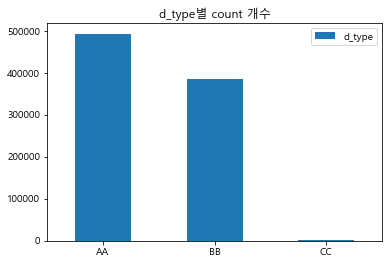

In [800]:
# d_type별 count개수
countbytypes = pd.DataFrame(df['d_type'].value_counts())
countbytypes.plot(kind = 'bar', title = 'd_type별 count 개수', rot = 0);

In [801]:
df['d_type'].value_counts()

AA    493166
BB    384541
CC      1564
Name: d_type, dtype: int64

In [802]:
# d_type이 user_id에 1:1 대응되는 모습
df.groupby('user_id')['d_type'].value_counts()

user_id  d_type
224      AA         2
232      BB        23
342      AA         1
565      AA         2
729      AA         1
                   ..
1830551  BB         1
1830570  BB         1
1830580  AA         1
1830589  BB         1
1830598  AA         1
Name: d_type, Length: 165425, dtype: int64

In [803]:
# d_type이 store_id에 n:m 대응되는 모습
df.groupby('store_id')['d_type'].value_counts()

store_id  d_type
4         AA        13
          BB        12
8         BB        28
          AA        19
161       BB         3
                    ..
231444    AA         1
231453    AA        14
          BB         8
231465    AA        10
          BB         4
Name: d_type, Length: 2272, dtype: int64

##### 2. goods_type

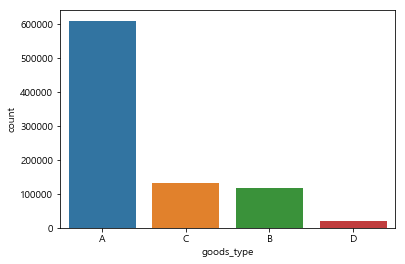

In [804]:
# goods_type 개수
sns.countplot(x = "goods_type", data = df)
plt.show()

In [805]:
df['goods_type'].value_counts()

A    609790
C    131163
B    118541
D     19777
Name: goods_type, dtype: int64

In [806]:
# date별 goods_type의 패턴
df.groupby(['date', 'goods_type']).size().unstack(fill_value=0).loc['2020-01-01':'2020-01-31',:]

goods_type,A,B,C,D
date,,,,
2020-01-01,661,34,210,19
2020-01-02,921,304,197,56
2020-01-03,905,505,268,46
2020-01-04,1553,144,454,37
2020-01-05,1065,56,351,27
2020-01-06,950,276,192,45
2020-01-07,1021,347,225,33
2020-01-08,997,437,195,33
2020-01-09,988,433,255,42


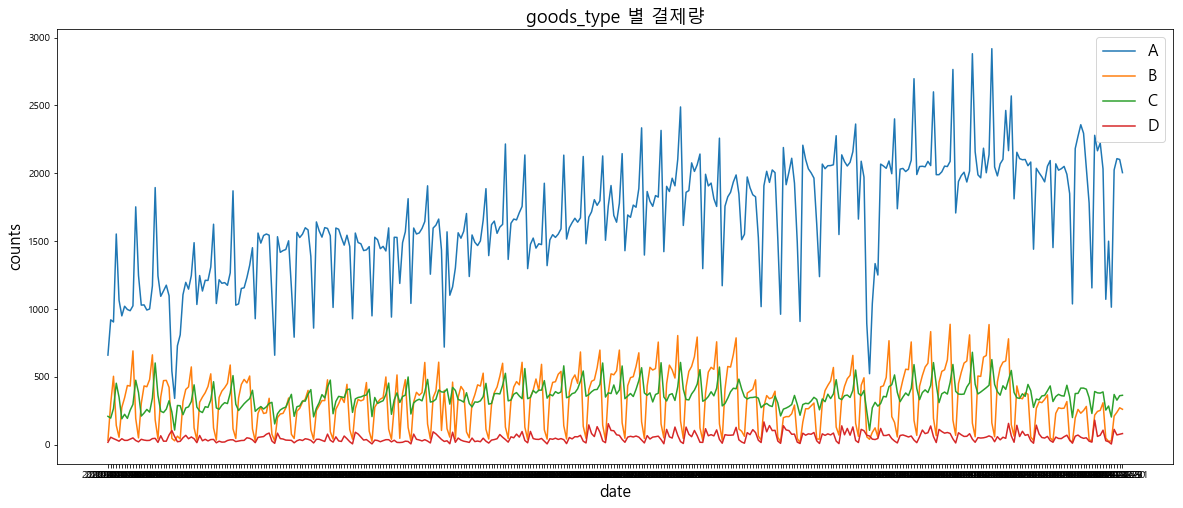

In [807]:
# goods_type 별 결제량 시각화
countbydate = df.groupby(['date', 'goods_type']).size().unstack(fill_value=0)

plt.figure(figsize=(20,8))
sns.lineplot(countbydate.index, countbydate['A'])
sns.lineplot(countbydate.index, countbydate['B'])
sns.lineplot(countbydate.index, countbydate['C'])
sns.lineplot(countbydate.index, countbydate['D'])

plt.legend(['A', 'B', 'C', 'D'], loc='best', fontsize=16)
plt.title('goods_type 별 결제량', fontsize=18)
plt.ylabel('counts', fontsize=16)
plt.xlabel('date', fontsize=16)
plt.xticks(ticks = None)
plt.show()


##### 3. ad1

In [808]:
df['ad1'].unique()

array(['GN', 'J', 'SC', 'MP', 'JRR', 'YD', 'GJ', 'YO', 'GSN', 'GBC', 'BF',
       'DJ', '0', 'CD', 'NO', 'CY', 'YC', 'SD', 'GD', 'GSW', 'DM', 'R',
       'GB', 'GS', 'GHN', 'SB', 'IND', 'P', 'GW', 'JR', 'GEJ', 'GGY',
       'GKP', 'CAS', 'SG', 'BJG', 'BHW', 'GAY', 'GYI', 'CCA', 'PJP',
       'GGC', 'IYS', 'DB', 'GGM', 'GAS', 'WOID', 'DIV', 'AOI', 'COI',
       'GPJ', 'SOI', 'ABP', 'DOI', 'WF', 'BI', 'ZP', 'EP', 'Q', 'BO',
       'ZE', 'RRR', 'QGI', 'DSO', 'SOD', 'BOI', 'WT', 'BP', 'SP', 'CN',
       'SJV', 'SDU', 'QH', 'BUD', 'CU', 'VU', 'WAE', 'NW', 'DY', 'WH',
       'GR', 'X', 'CVB', 'ADS', 'VO'], dtype=object)

<br><br>
### 📋 Data description 재정의

|변수명|정의|값|
|:---:|:---:|:---|
|count|결제 건수||
|join_date|가입일||
|d_type|**결제 수단**|AA : 카드 결제<br>BB : 네이버 페이<br>CC : 휴대폰 결제|
|store_id|점포 주소||
|goods_type|**판매 주차권**|A : 모든 종류의 평일 주간 주차권<br>B : 모든 종류의 평일 야간 주차권<br>C : 모든 종류의 주말 주간 주차권<br>D : 모든 종류의 주말 야간 주차권|
|date|결제일||
|count|결제 건수||
|ad1|**지역 코드**|예) GN : 강남, MP : 마포 ...|

<br>

* goods_type 세분화

|goods_type|주간|야간|
|---|---|---|
|평일|A|B|
|주말|C|D|

* 지역 코드 ad1의 경우, 함께 주어진 외부 데이터가 서울시 중심이라 서울 지역을 세분화한 코드라고 예측.

❗️ **회의를 통해 가장 가능성이 높은 설명을 붙였으며, 정의를 단정짓기는 어려움**


<br><br>
## 🚫 Step 2. 결측치, 이상치 확인

+ 결측치 : 없음
+ 이상치 : 
 - join_date == 1970-01-01 데이터는 치환 없이 삭제하기로 결정 (5.10 회의)
 - user_id == 999665 데이터는 비상식적인 결제량 정보를 담고 있으므로 제거 (찬서님 의견 + 코드)

In [809]:
# Unix time error
df[(df['join_date'] == '1970-01-01')].sort_values(by = 'count', ascending = False)

,user_id,join_date,d_type,store_id,goods_type,date,count,ad1
368711,1277650,1970-01-01,CC,92264,C,2020-06-26,4,JRR
269797,851134,1970-01-01,CC,190482,A,2020-05-17,3,GN
71522,1493307,1970-01-01,CC,82433,D,2020-02-10,3,CY
590435,1661920,1970-01-01,CC,109877,C,2020-09-18,2,GN
139409,654237,1970-01-01,CC,181777,C,2020-03-17,2,BF
...,...,...,...,...,...,...,...,...
175767,654237,1970-01-01,CC,181777,C,2020-04-03,1,BF
176320,1071641,1970-01-01,CC,221045,A,2020-04-03,1,GN
176853,1355917,1970-01-01,CC,220700,A,2020-04-03,1,GN
176971,1415023,1970-01-01,CC,131081,A,2020-04-03,1,YO


In [810]:
df[(df['user_id'] == 999665)].sort_values(by = 'count', ascending = False).head(10)

,user_id,join_date,d_type,store_id,goods_type,date,count,ad1
729776,999665,2018-12-16,CC,96266,A,2020-11-07,61,GN
748372,999665,2018-12-16,CC,109677,A,2020-11-13,59,JRR
751974,999665,2018-12-16,CC,1109,A,2020-11-14,58,JRR
726277,999665,2018-12-16,CC,190055,A,2020-11-06,55,SB
767392,999665,2018-12-16,CC,131081,A,2020-11-19,53,YO
687010,999665,2018-12-16,CC,182320,A,2020-10-24,51,JRR
690265,999665,2018-12-16,CC,222401,A,2020-10-25,50,CY
708664,999665,2018-12-16,CC,104067,A,2020-10-31,50,MP
764097,999665,2018-12-16,CC,220607,A,2020-11-18,49,GN
705100,999665,2018-12-16,CC,1900,C,2020-10-30,49,GN


In [811]:
df = df[(df['join_date'] != '1970-01-01')]
df = df[df['user_id'] != 999665]

<br><br><br>
## 🔧Step 3. Feature Engineering 진행

- 1. 외부데이터인 '서울시_기상데이터.csv'를 이용하여 count와 관계가 있을 만한 변수를 가져온다.
- 2. 주어진 데이터의 기본 변수에서 새로운 컬럼을 추가한다.


#### ✅Feature Engineering 을 진행하기 전 먼저 train과 test 데이터를 분류해준다.

In [812]:
# train, test
train = df[df.date <= '2020-09-30']
test = df[df.date > '2020-09-30']
display(train, test)

,user_id,join_date,d_type,store_id,goods_type,date,count,ad1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR
...,...,...,...,...,...,...,...,...
623574,1709914,2020-09-30,BB,221022,B,2020-09-30,1,GN
623575,1709935,2020-09-30,AA,725,B,2020-09-30,1,MP
623576,1709942,2020-09-30,AA,223058,B,2020-09-30,1,BF
623577,1709950,2020-09-30,BB,182320,A,2020-09-30,2,JRR


,user_id,join_date,d_type,store_id,goods_type,date,count,ad1
623579,15521,2014-09-12,AA,182320,A,2020-10-01,1,JRR
623580,17651,2014-09-19,BB,82434,D,2020-10-01,1,J
623581,26388,2014-10-25,BB,182320,A,2020-10-01,1,JRR
623582,81772,2015-05-02,BB,204438,A,2020-10-01,1,DJ
623583,92258,2015-05-24,AA,220745,A,2020-10-01,1,SD
...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J


#### 1. 외부 데이터 Feature Engineering

In [813]:
weather_data = pd.read_csv('서울시_기상데이터.csv', encoding='cp949')
weather_data.dtypes

지점        int64
일시       object
기온      float64
강수량     float64
풍속      float64
습도        int64
일조시간    float64
적설량     float64
지면온도    float64
지중온도    float64
dtype: object

In [814]:
# 데이터 기본 전처리
weather_data['일시'] = weather_data['일시'].astype('datetime64')
weather_data['date'] = weather_data['일시'].dt.date

# 날씨 데이터의 `기온` 컬럼에서 8월 26일 13시 데이터 하나가 결측치로 잡혀있다. 
# 이 부분은 12시 데이터와 14시 데이터를 참고하여 34℃로 삽입했다.
weather_data['기온'] = weather_data['기온'].fillna(34)
weather_data = weather_data.fillna(0)

In [815]:
# 일 최고기온과 누적강수량, 불쾌지수를 구하는 weather_max
weather_data['누적강수량'] = weather_data.groupby('date')['강수량'].cumsum()
weather_data['discomfort'] = (0.81 * weather_data['기온']) + (0.01*weather_data['습도']*(0.99*weather_data['기온']-14.3)) + 46.3
weather_max = weather_data.groupby('date').max().reset_index()

# 누적강수량 15mm를 기준으로 [강한비, 약한비, 해당없음, 눈온날] 로 구분하는 extreme_weather
weather_max['extreme_weather'] = np.where(weather_max["적설량"].values > 0, '눈', np.where(weather_max["누적강수량"].values > 15, '강한비', np.where(weather_max["누적강수량"].values > 0, '약한비', '없음')))

# 날씨 데이터 12월 31일 데이터에는 00시 날씨 정보만 삽입되어 있기 때문에 최고 기온을 고쳐준다.  
weather_max.loc[365, '기온'] = -5

# 불쾌지수를 그룹핑해주는 discomfort_index
weather_max['discomfort_index'] = np.where(weather_max["discomfort"].values > 80, '매우불쾌', np.where(weather_max["discomfort"].values > 70, '불쾌', '쾌적'))

# 변수명을 최고기온으로 맞춰주고, date의 type을 시간데이터로 맞춰서 머지
weather_max = weather_max.rename(columns = {'기온': 'max_temp'}, inplace = False)
weather_max = weather_max[['date', 'max_temp', 'discomfort_index', 'extreme_weather']]
df['date'] = df['date'].astype('datetime64')
weather_max['date'] = weather_max['date'].astype('datetime64')
df = pd.merge(df, weather_max, how = 'left', on = 'date')

#### 2. 기본 변수에 대한 Feature Engineering

In [816]:
# 기본 날짜 데이터 쪼개기
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['week'] = df['date'].dt.isocalendar().week

# 공휴일 추가
df['isholiday'] = df['date'].isin(['2020-01-01', '2020-01-24', '2020-01-25', '2020-01-26', '2020-03-01', '2020-04-30', '2020-05-05', '2020-06-06', '2020-08-15', '2020-08-17', '2020-09-30', '2020-10-01', '2020-10-02', '2020-10-03', '2020-10-09', '2020-12-25'])

# 몇개월차 유저인가
df['join_date'] = df['join_date'].astype('datetime64')
df['howlonguser'] = (df['year']*12 + df['month']) - (df['join_date'].dt.year*12 + df['join_date'].dt.month) + 1

In [817]:
# 해당 날짜까지의 누적 카운트를 구하는 freq_cum과 활성화 정도를 보여주는 active를 구하기 위한 코드

# 누적 결제 횟수
df_l = df.sort_values(['user_id','date']).reset_index(drop=True)
df_l['next'] = df_l.sort_values(['user_id','date']).groupby('user_id')['date'].shift(-1)
df_l['before'] = df_l.sort_values(['user_id','date']).groupby('user_id')['date'].shift(1)
df_l['freq_cum'] = pd.DataFrame(df_l.groupby(['user_id','date'])['before'].count()).groupby('user_id')['before'].cumsum().values
df_l['ranking'] = np.where(df_l["freq_cum"].values <= 1 , '브론즈', np.where(df_l["freq_cum"].values <= 5 , '실버', np.where(df_l["freq_cum"].values <= 18 , '골드', '플레티넘')))

In [818]:
# ranking을 분류하는 기준은 누적 카운트의 통계량을 기준으로 정했음
df_l['freq_cum'].describe()

count                877,812
mean                      15
std                       24
min                        0
25%                        1
50%                        5
75%                       18
max                      243
Name: freq_cum, dtype: float64

In [819]:
# 활성화 정도를 보여주는 active를 구하기
# 주의할 점 : active는 현시점(2020-12-31)을 기준으로 고객을 분류하기 때문에 EDA에서만 사용하고 모델링에서는 반드시 제거해줘야함

df_l['comeback'] = (pd.to_datetime('2020-12-31') - df_l['date']).dt.days

# 최근 결제 날짜
www = pd.DataFrame(df_l.groupby(['user_id'])['comeback'].min()).reset_index()
www = www.rename(columns = {'comeback': 'min_cb'}, inplace = False)

# 최대 누적 카운트
eee = pd.DataFrame(df_l.groupby(['user_id'])['freq_cum'].max()).reset_index()
eee = eee.rename(columns = {'freq_cum': 'max_freq'}, inplace = False)

df_cb = pd.merge(www, eee, how = 'left', on = 'user_id')
df_l = pd.merge(df_l, df_cb, how = 'left', on = ['user_id'])
df_l['active'] = np.where(df_l['min_cb'] <= 31, '활성유저', np.where(df_l['max_freq'] >= 5, '잠수유저', '비활성유저'))

In [820]:
# freq_cum과  active를 df에 머지
freqbyuser = df_l[['user_id', 'date', 'freq_cum', 'ranking', 'active']]
df = pd.merge(df, freqbyuser, how = 'left', on = ['user_id', 'date'])

####################### howlonguser를 기준으로 고객 등급 매기기
df['howlong'] = np.where(df['howlonguser'] <= 3, '1~3', np.where(df['howlonguser'] <= 6, '3~6', np.where(df['howlonguser'] <= 12, '6~12', np.where(df['howlonguser'] <= 24, '1년차', '2년 이상'))))

In [821]:
# 각 그룹에 대한 데이터는 균형있게 들어갔는지 확인
df['ranking'].value_counts()

브론즈     255588
골드      218012
플레티넘    216979
실버      187233
Name: ranking, dtype: int64

In [822]:
df['active'].value_counts()

활성유저     380526
잠수유저     294942
비활성유저    202344
Name: active, dtype: int64

In [823]:
df['howlong'].value_counts()

1~3      219630
2년 이상    201190
1년차      187005
6~12     156922
3~6      113065
Name: howlong, dtype: int64

<br><br>
#### 🔧Feature Engineering 내용 정리

1. 주어진 서울시 기상데이터 csv 파일로 `weather`, `mean_temp`, `temp_diff` 변수를 추가했다.
    - weather : 날씨 ('눈', '비', '해당없음')
    - mean_temp : 평균 온도
    - temp_diff : 일교차 (일 최고기온 - 최저기온)
<br> 주어진 데이터에서 기온 값에 하나의 NA값이 존재하는데, max나 min에 영향을 받지 않을 정도의 숫자 30을 임의로 집어넣었다.
<br>또한 12월 31일 날짜에는 00시 데이터만 있다. 12월 31 날짜의 평균 온도와 일교차는 아래 링크를 참고하여 데이터를 삽입했다.<br>  https://www.weather.go.kr/weather/climate/past_cal.jsp?stn=108&yy=2020&mm=12&x=20&y=5&obs=1
<br><br>
2. date 변수를 연, 월, 일자, 날짜, 주차로 쪼개서 저장하여 각각 `year`, `month`, `day`, `weekday`, `week`의 변수를 추가했다.
<br><br>
3. (결제년월 - 가입년월)로 몇 개월차 유저인지 파악하는 변수 `howlonguser`를 만들었다.
<br><br>
4. 국가 공휴일 데이터인 `isholiday` 변수를 추가했다. 다음의 사이트를 참고하였다.<br>
https://publicholidays.co.kr/ko/2020-dates/
<br><br>
5. 누적 결제를 카운트하는 `freq_cum`을 만들고 `freq_cum`의 통계량을 바탕으로 회원 등급을 매기는 `ranking` 컬럼을 만들었다. (지인님 코드)
    - 브론즈 : 0 ~ 1회
    - 실버 : 2 ~ 5회
    - 골드 : 6 ~18회
    - 플래티넘 : 19회 이상
<br><br>
6. 2020년 12월 31일을 기준으로 유저의 활성화 정도를 확인하는 `active` 컬럼을 만들었다.
    - 활성유저 : 한 달 이내 결제 건이 있는 유저
    - 잠수유저 : 한 달 이내 결제 건은 없지만 이전 count 건수가 5회 이상인 유저
    - 비활성유저 : 한 달 이내 결제 건도 없고, 이전 count 건수가 5회 미만인 유저
    
#### ⚠️ year와 active컬럼은 모델링 과정에서 drop해야하는 컬럼이다

## 🚙 Step 4. EDA

#### 1. count
종속 변수이기 때문에 필수적으로 살펴본다.

In [824]:
# count
df['count'].value_counts()

1     862704
2      13500
3       1058
4        270
5        133
6         63
7         36
9         12
8         11
10         6
15         4
11         3
12         3
13         3
23         2
22         1
17         1
19         1
20         1
Name: count, dtype: int64

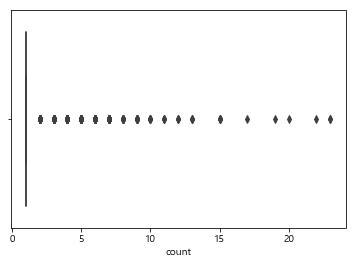

In [825]:
# count == 1이 아니면 전부 이상치로 판단하는 모습
sns.boxplot(x = "count",
            data = df)
plt.show()

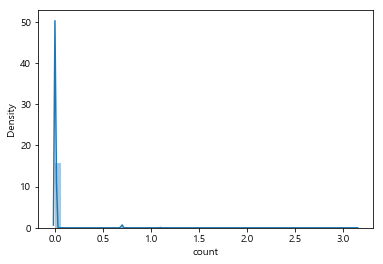

In [826]:
# count 빈도 log
sns.distplot(np.log(df['count']));

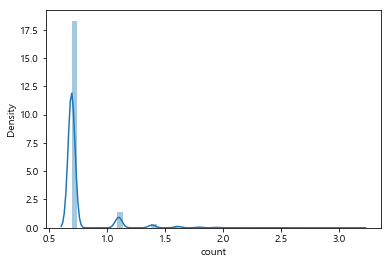

In [827]:
# count != 1 빈도
withoutcount1 = df.drop(df[df['count'] == 1].index)
sns.distplot(np.log(withoutcount1['count']));

<br>

#### 2. corrplot

상관 분석을 위해 corrplot을 그려본다.

count == 1의 값이 압도적으로 많으므로, count == 1을 제외한 데이터의 corrplot도 함께 살펴본다.

##### 1) count == 1 포함 corrplot

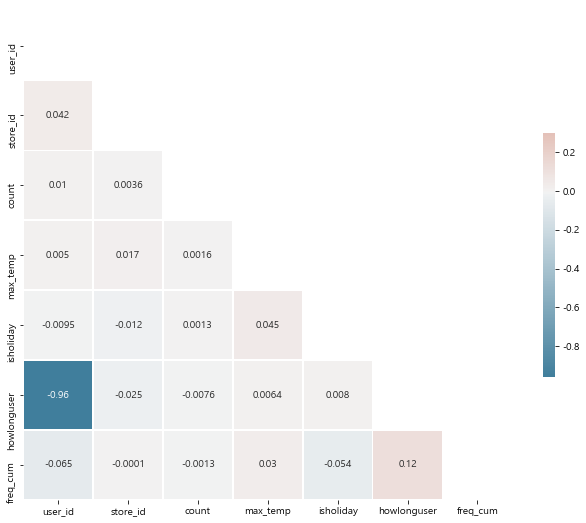

In [828]:
df_corr = df.drop(['year', 'month', 'day', 'weekday', 'week'], 1)

corr = df_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

##### 2) count != 1 데이터의 corrplot

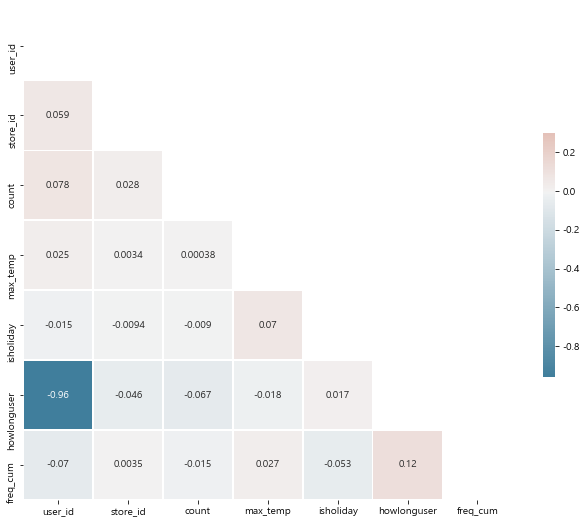

In [829]:
no_one = df_corr[df_corr['count'] != 1]

corr = no_one.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

#### corrplot 결과

0. 데이터가 갖는 편향성(count == 1이 압도적) 때문에 corrplot으로 count와 다른 feature들과의 상관관계를 정확히 파악하기 힘듬
1. count가 1인 경우를 제외하면서 corrplot을 살펴보았을 때도 마찬가지임
2. 2020년 결제 데이터라 `year` 변수는 모델링 관점에서는 의미가 없음
3. `howlonguser`와 `user_id`의 상관계수가 -1에 가깝기 때문에 모델링 시 하나의 변수는 제거 가능

#### 3. Features

##### Q1) 요일별 결제량은 어떻게 변할까?

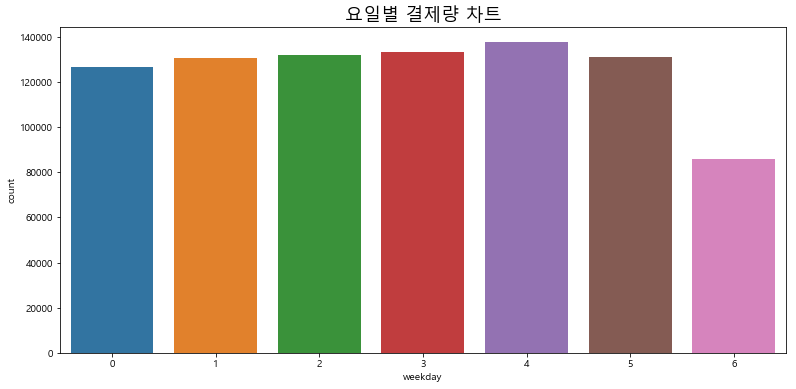

In [830]:
plt.figure(figsize=(13,6))
sns.countplot(data = df, x = 'weekday')
plt.title('요일별 결제량 차트', fontsize=18);

- 금요일 결제량이 더 높다는 점 외엔 월요일부터 토요일까지는 큰 변화가 없지만, 일요일 결제량은 크게 감소하는 것을 확인할 수 있다.
<br><br>

##### Q2) 월별 결제량 차트는 어떻게 나타날까?

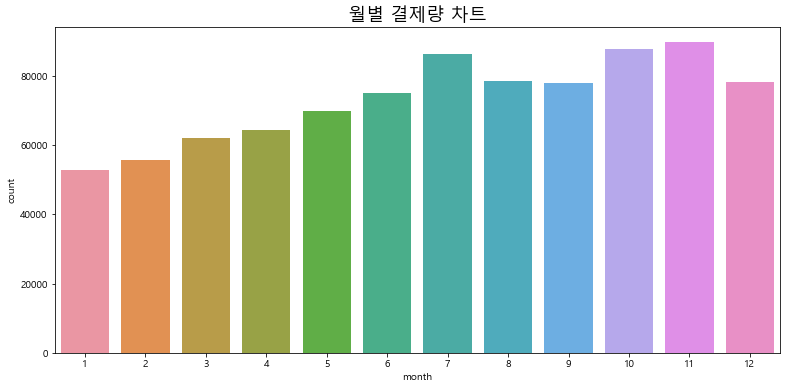

In [831]:
plt.figure(figsize=(13,6))
sns.countplot(data = df, x = 'month')
plt.title('월별 결제량 차트', fontsize=18);

- 2020년 결제건만 존재하기 때문에 월별 결제량 차트의 유의미한 해석이 불가능해보인다.
<br><br>

<br>

##### Q3) 최고 기온에 따른 이용량은 어떻게 나타날까?

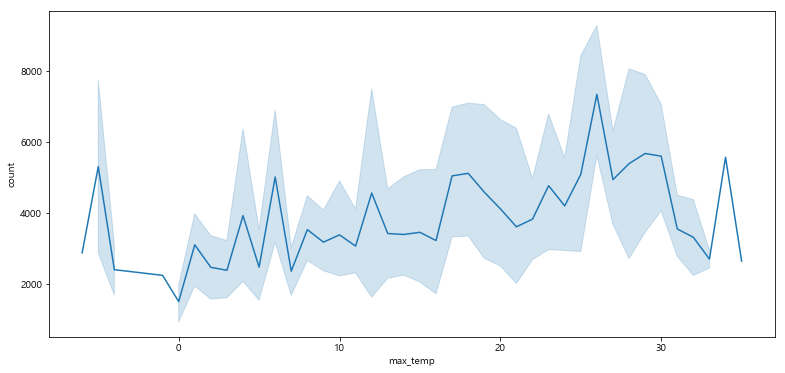

In [832]:
# 평균 온도에 따른 이용량 추이
plt.figure(figsize=(13,6))
df_m_temp = df.groupby('max_temp')['count'].sum().reset_index()
df_m_temp['max_temp'] = round(df_m_temp['max_temp'])
sns.lineplot(data = df_m_temp, x = 'max_temp', y = 'count');

- 최고 기온에 따른 이용량을 보면, 25 ~ 27℃ 사이에 결제량이 많은 걸 확인할 수 있다. (그래프는 최고 기온의 소수점 첫째자리에서 반올림)

- 한편 데이터가 2020년에 제한된 데이터이기 때문에, 날짜와 관련된 차트는 유의성을 판단하기가 어렵다.

##### Q4) 불쾌지수에 가장 민감한 반응을 보인 유저는 어떤 유저일까?

In [833]:
zzz = df[df['discomfort_index'] == "매우불쾌"]

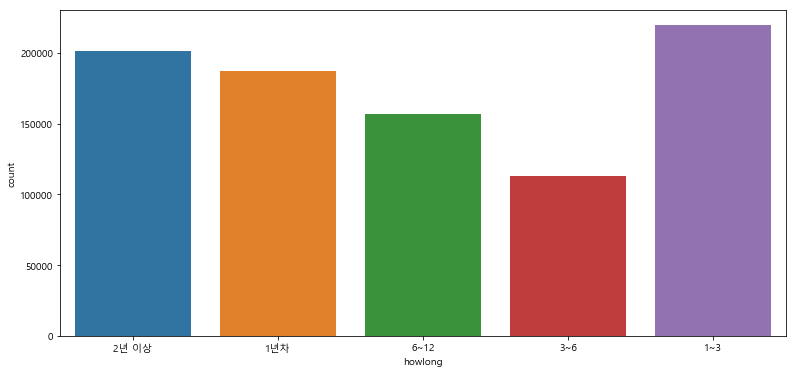

In [834]:
plt.figure(figsize=(13,6))
sns.countplot(x = "howlong",  data = df)
plt.show()

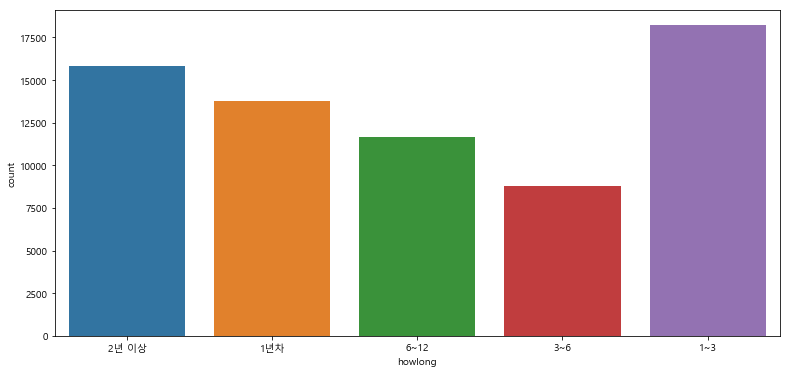

In [835]:
plt.figure(figsize=(13,6))
sns.countplot(x = "howlong",  data = zzz)
plt.show()

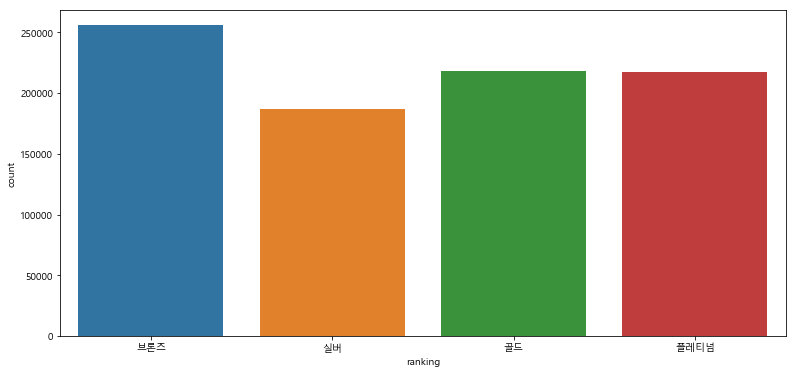

In [836]:
plt.figure(figsize=(13,6))
sns.countplot(x = "ranking",  data = df, order = ['브론즈', '실버', '골드', '플레티넘'])
plt.show()

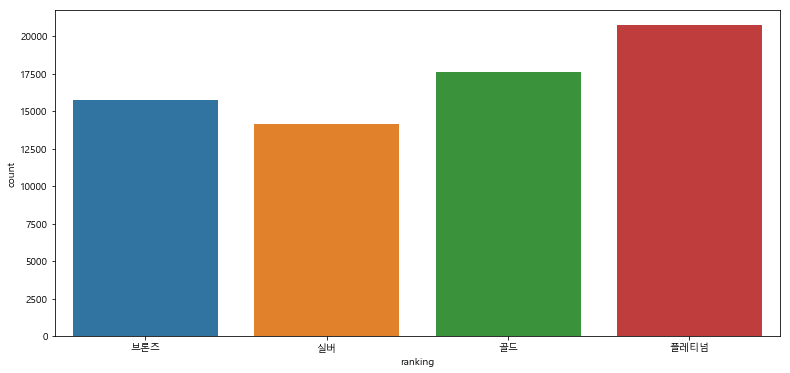

In [837]:
plt.figure(figsize=(13,6))
sns.countplot(x = "ranking", data = zzz, order = ['브론즈', '실버', '골드', '플레티넘'])
plt.show()

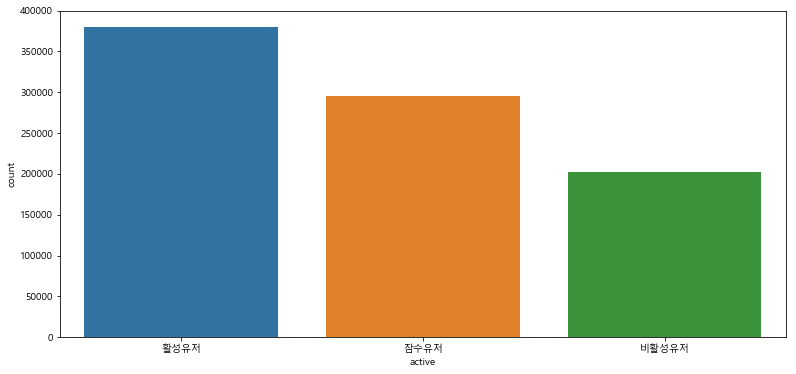

In [838]:
plt.figure(figsize=(13,6))
sns.countplot(x = "active", data = df, order = ['활성유저', '잠수유저', '비활성유저'])
plt.show()

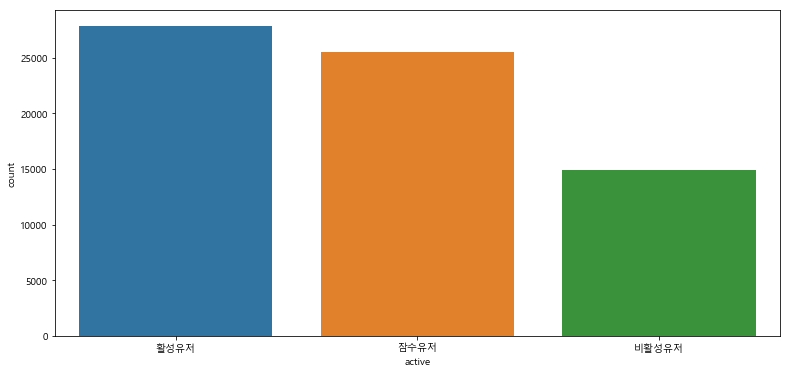

In [839]:
plt.figure(figsize=(13,6))
sns.countplot(x = "active", data = zzz,order = ['활성유저', '잠수유저', '비활성유저'])
plt.show()

- ranking으로 보았을 때는 플래티넘 유저가, active로 보았을 때는 잠수 유저가 불쾌지수가 높은 날에 상대적으로 더 많이 이용했다.

aa1 = df['active'].value_counts().reset_index()
aa2 = df[df['discomfort_index'] == '불쾌']['active'].value_counts().reset_index()
aa3 = pd.concat([aa1.transpose(), aa2.transpose()])
aa3 = aa3.loc["active"]
aa3 = aa3.rename(columns = {0: '활성유저', 1:'잠수유저', 2:'비활성유저'}, inplace = False)

stacked_data = aa3.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, rot=0)
plt.title("불쾌지수에 따른 이용량 변화")
plt.xlabel(" ");

bb1 = df['howlong'].value_counts().reset_index()
bb2 = df[df['discomfort_index'] == '불쾌']['howlong'].value_counts().reset_index()
bb3 = pd.concat([bb1.transpose(), bb2.transpose()])
bb3 = bb3.loc["howlong"]
bb3 = bb3.rename(columns = {0: '1~3', 1:'3~6', 2:'6~12', 3:'1년차', 4:'2년 이상'}, inplace = False)
stacked_data = bb3.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, rot=0)
plt.title("Mince Pie Consumption Breakdown")
plt.xlabel(" ");

cc1 = df['ranking'].value_counts().reset_index()
cc2 = df[df['discomfort_index'] == '불쾌']['ranking'].value_counts().reset_index()
cc3 = pd.concat([cc1.transpose(), cc2.transpose()])
cc3 = cc3.loc["ranking"]
cc3 = cc3.rename(columns = {0: '브론즈', 1:'골드', 2:'플래티넘', 3:'실버'}, inplace = False)
stacked_data = cc3.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, rot=0)
plt.title("Mince Pie Consumption Breakdown")
plt.xlabel(" ");

##### Q5) extreme_weather에 구애받지 않는 유저는?

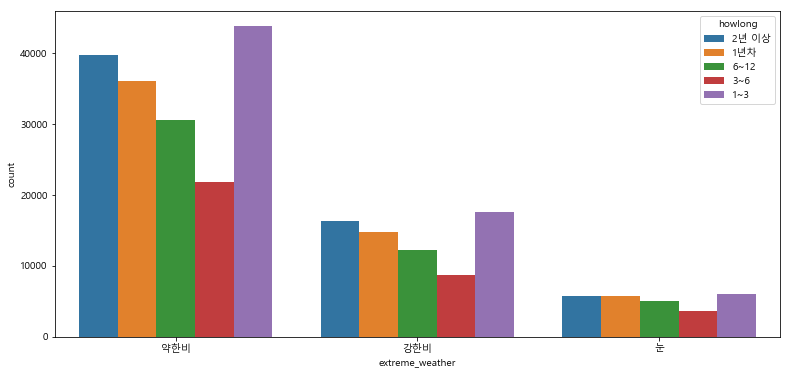

In [840]:
plt.figure(figsize=(13,6))
sns.countplot(x = "extreme_weather",  hue = "howlong", data = df[df['extreme_weather'] != "없음"])
plt.show()

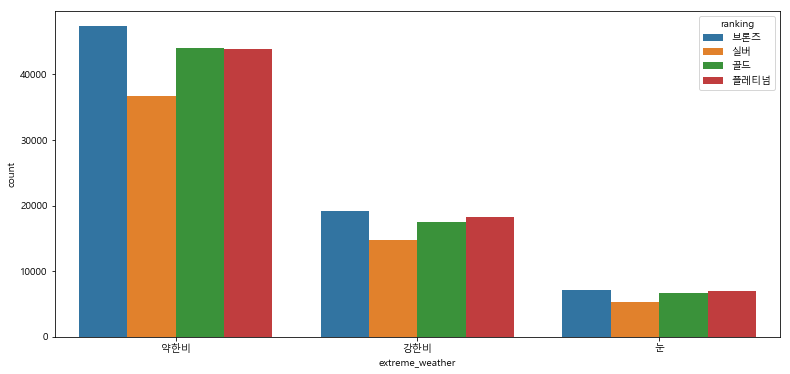

In [841]:
plt.figure(figsize=(13,6))
sns.countplot(x = "extreme_weather",  hue = "ranking", data = df[df['extreme_weather'] != "없음"])
plt.show()

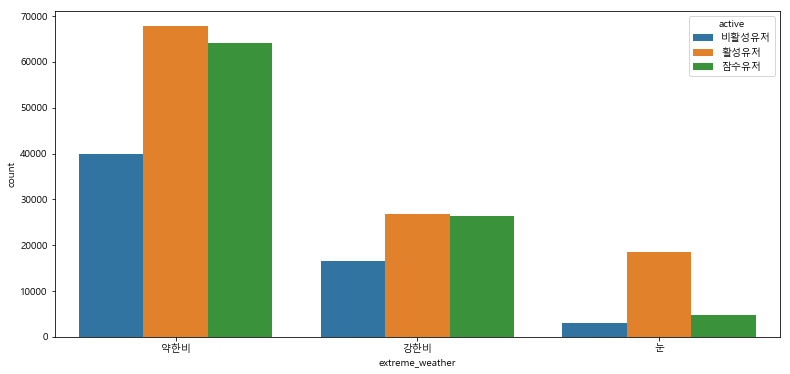

In [842]:
plt.figure(figsize=(13,6))
sns.countplot(x = "extreme_weather",  hue = "active", data = df[df['extreme_weather'] != "없음"])
plt.show()

- extreme_weather에 대한 반응은 howlong과 ranking에서는 나타나지 않는다.
- 활성유저는 눈이 오늘 날 주차장을 찾기 위한 활동에 조금 더 적극적이다.

In [843]:
snow = df[df['extreme_weather'] == '눈'][['user_id', 'join_date', 'date']].drop_duplicates()
print(len(snow))
snow['gap'] = (snow['date'] - snow['join_date']).dt.days
len(snow[snow['gap'] == 0])


26211


901

- 한편 2020년 눈이 내리는 날에 모두의 주차장 앱에 가입하여 결제까지 진행한 유저는 901명으로, 전체 눈 오는 날 결제 건수의 3.4% 정도이다.

##### Q6) 유저의 가입기간, 등급, 활성화 정도에 따라 날짜별 이용이 어떻게 달라질까?

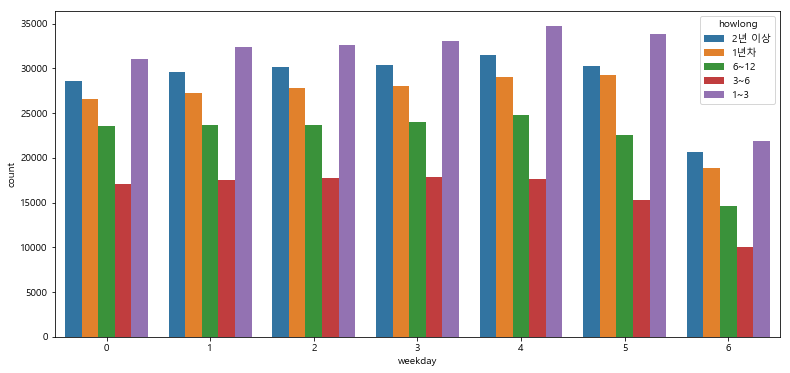

In [844]:
plt.figure(figsize=(13,6))
sns.countplot(x = "weekday",  hue = "howlong", data = df)
plt.show()

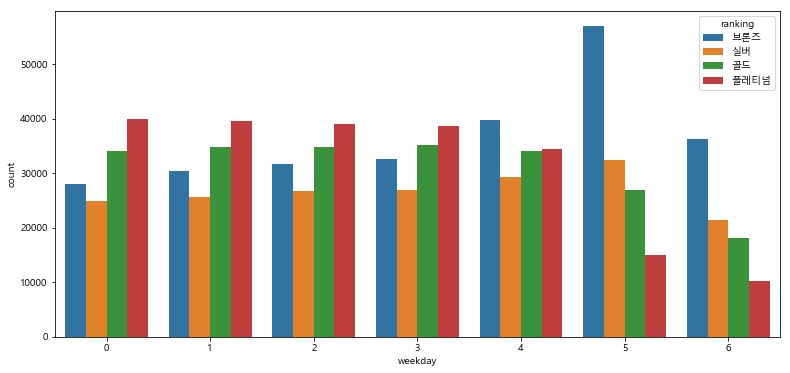

In [845]:
plt.figure(figsize=(13,6))
sns.countplot(x = "weekday",  hue = "ranking", data = df)
plt.show()

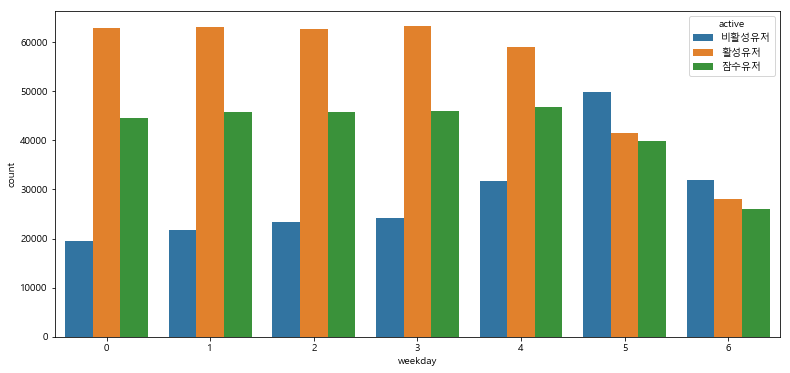

In [846]:
plt.figure(figsize=(13,6))
sns.countplot(x = "weekday",  hue = "active", data = df)
plt.show()

- 유저의 가입기간에 따른 날짜별 이용량은 큰 차이가 없다.
- 등급이 높은 유저일수록(모두의 주차장 앱을 많이 이용한 유저일수록) 주중 이용 횟수가 주말 이용 횟수보다 많아진다. 
- 활성유저는 평일 이용량이 주말보다 높다. 
- 잠수유저의 이용량 추이는 활성유저와 비슷하지만, 비활성 유저의 경우는 정반대로 이용량이 금토일에 집중적으로 나타났다. 

##### Q7) 유저의 가입기간, 등급, 활성화 정도에 따라 goods_type 이용이 어떻게 달라질까?

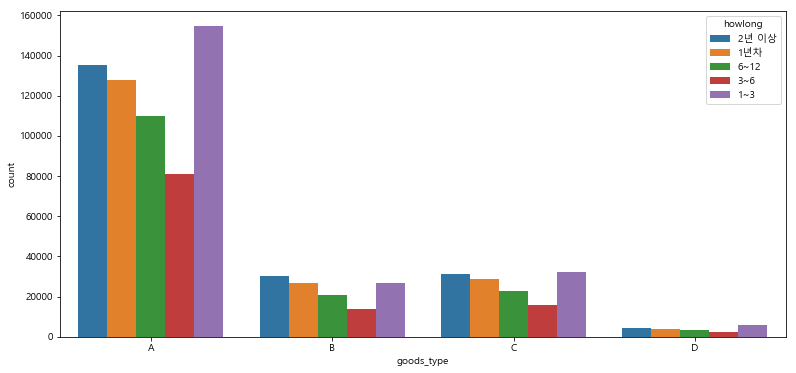

In [847]:
plt.figure(figsize=(13,6))
sns.countplot(x = "goods_type",  hue = "howlong", data = df, order = ['A', 'B', 'C', 'D'])
plt.show()

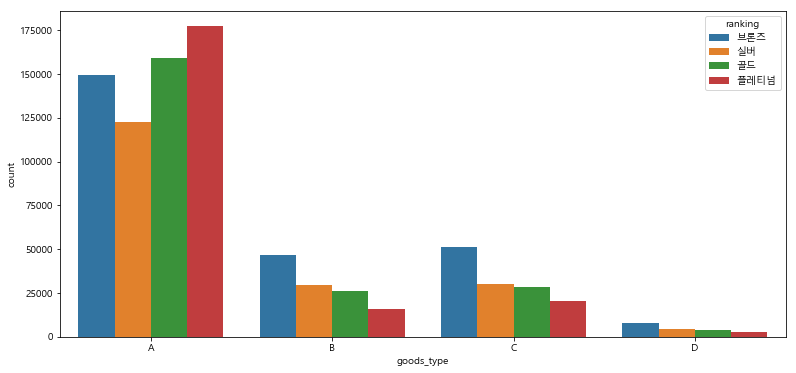

In [848]:
plt.figure(figsize=(13,6))
sns.countplot(x = "goods_type",  hue = "ranking", data = df, order = ['A', 'B', 'C', 'D'])
plt.show()

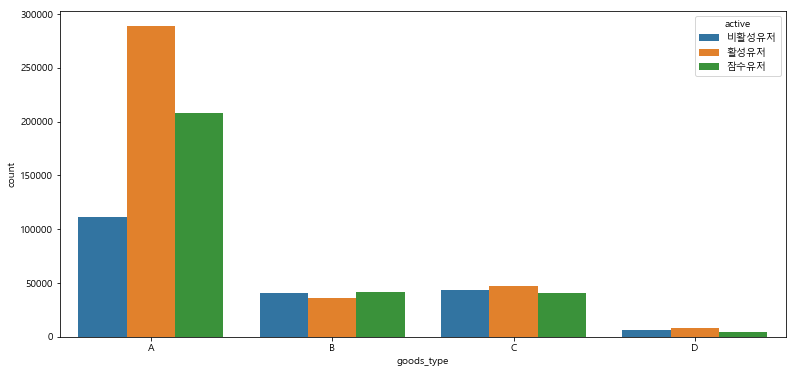

In [849]:
plt.figure(figsize=(13,6))
sns.countplot(x = "goods_type",  hue = "active", data = df, order = ['A', 'B', 'C', 'D'])
plt.show()

- 가입 기간에 따른 goods_type 이용의 차이는 보이지 않는다.
- 등급에 따라 goods_type 이용을 살펴보았을 때, 모두의 주차장 앱을 많이 이용한 유저(골드, 플레티넘)일수록 type A를 많이 이용하는 것으로 보인다. 
- 그리고 이용량이 적은 유저(브론즈, 실버)일수록 상대적으로 B와 C type을 더 구매하는 것을 알 수 있다.
- 유저 활성화는 goods_type의 관계에서 재미있는 건 비율에 상관없이 B, C, D를 이용하는 건수가 엇비슷하다는 점이다. 하지만 전반적으로 Type A를 가장 많이 이용한다.

In [850]:
##### Q8) 

### 🚙 EDA 내용 정리

1. count == 1 값이 압도적이라 corrplot에서 모든 feature가 count와의 상관관계 값을 0으로 갖는다. 로그를 씌워도 정규성 확보가 어렵다.

2. corrplot의 상관관계는 count가 1인 경우를 제외하고 보더라도 크게 달라지지 않는다. 이외에도 다른 방식으로 살펴보았는데 count가 8 이상일 때 상관계수에 의미있는 숫자들이 등장했다. 그렇지만 이 경우는 데이터가 70개 정도로 상관 분석을 하기에 적당하지 않다. 따라서 해당 데이터로 상관관계를 분석하는 것은 의미가 없다고 판단한다.

3. 비활성유저와 잠수유저의 특징에 맞게 깨우는 방법이 달라져야 한다.
    <br>예) 잠수 유저는 평일 주차권 쿠폰, 비활성유저는 금토일 주차권 쿠폰 제공

4. 유저 등급에 따라 쿠폰 제공을 다르게 해야 한다.
    <br>예) 신규유저(브론즈 등급)에게는 금토일 주차권 제공, 고인물일수록 평일 주차권 쿠폰 제공
    
5. 신규 유저와 비활성유저가 보여지는 추세가 비슷하다. 재결제를 유도하기 위한 전략이 필요하다.
    <br>- 고객 정보를 이용한 방향 :
    <br>고객이 30대 이상이면 자차로 이동할 확률이 높다고 판단해서 30대 이상 복귀 유저에게 쿠폰 증정
    <br>- 차량 정보를 이용한 방향 :
    <br>차량 번호 조회로 렌트카인지 아닌지 확인 후, 렌트카 유저를 제외하고 쿠폰 증정

## ⚙️ Step 5. label encoding과 Random Forest Regressor

0. label encoding 전 train, test 데이터 확인. 전체 데이터(df)의 결측치 재확인
1. 전체 데이터를 가공용 데이터(alldata)로 만들어서 코드 진행. 
2. 문자열 변수의 경우 전체 label encoding 진행
3. alldata를 train, test 데이터의 차원에 맞게 쪼개기
4. 불필요한 변수 제거
5. 예측
6. 예측 평가 MSE, MAE

In [851]:
display(train, test, df)

,user_id,join_date,d_type,store_id,goods_type,date,count,ad1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR
...,...,...,...,...,...,...,...,...
623574,1709914,2020-09-30,BB,221022,B,2020-09-30,1,GN
623575,1709935,2020-09-30,AA,725,B,2020-09-30,1,MP
623576,1709942,2020-09-30,AA,223058,B,2020-09-30,1,BF
623577,1709950,2020-09-30,BB,182320,A,2020-09-30,2,JRR


,user_id,join_date,d_type,store_id,goods_type,date,count,ad1
623579,15521,2014-09-12,AA,182320,A,2020-10-01,1,JRR
623580,17651,2014-09-19,BB,82434,D,2020-10-01,1,J
623581,26388,2014-10-25,BB,182320,A,2020-10-01,1,JRR
623582,81772,2015-05-02,BB,204438,A,2020-10-01,1,DJ
623583,92258,2015-05-24,AA,220745,A,2020-10-01,1,SD
...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J


,user_id,join_date,d_type,store_id,goods_type,date,count,ad1,max_temp,discomfort_index,extreme_weather,year,month,day,weekday,week,isholiday,howlonguser,freq_cum,ranking,active,howlong
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,0,쾌적,약한비,2020,1,1,2,1,True,73,0,브론즈,비활성유저,2년 이상
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,0,쾌적,약한비,2020,1,1,2,1,True,72,0,브론즈,비활성유저,2년 이상
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,0,쾌적,약한비,2020,1,1,2,1,True,63,0,브론즈,비활성유저,2년 이상
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,0,쾌적,약한비,2020,1,1,2,1,True,62,0,브론즈,활성유저,2년 이상
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,0,쾌적,약한비,2020,1,1,2,1,True,62,0,브론즈,비활성유저,2년 이상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877807,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,-5,쾌적,없음,2020,12,31,3,53,False,1,0,브론즈,활성유저,1~3
877808,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,-5,쾌적,없음,2020,12,31,3,53,False,1,0,브론즈,활성유저,1~3
877809,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,-5,쾌적,없음,2020,12,31,3,53,False,1,0,브론즈,활성유저,1~3
877810,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,-5,쾌적,없음,2020,12,31,3,53,False,1,0,브론즈,활성유저,1~3


In [852]:
df.dtypes

user_id                      int64
join_date           datetime64[ns]
d_type                      object
store_id                     int64
goods_type                  object
date                datetime64[ns]
count                        int64
ad1                         object
max_temp                   float64
discomfort_index            object
extreme_weather             object
year                         int64
month                        int64
day                          int64
weekday                      int64
week                        UInt32
isholiday                     bool
howlonguser                  int64
freq_cum                     int64
ranking                     object
active                      object
howlong                     object
dtype: object

In [853]:
df.isna().sum()

user_id             0
join_date           0
d_type              0
store_id            0
goods_type          0
date                0
count               0
ad1                 0
max_temp            0
discomfort_index    0
extreme_weather     0
year                0
month               0
day                 0
weekday             0
week                0
isholiday           0
howlonguser         0
freq_cum            0
ranking             0
active              0
howlong             0
dtype: int64

In [854]:
alldata = df

In [855]:
le = LabelEncoder()

cat_cols = alldata.columns[alldata.dtypes == object]
for i in cat_cols:
    alldata[i] = le.fit_transform(alldata[i])

In [863]:
# drop columns
# train, test
train2 = alldata[alldata.date <= '2020-09-30']
test2 = alldata[alldata.date > '2020-09-30']

# week를 드랍하는 이유는 우리나라 명절 중 설날, 추석은 음력으로 계산하기 때문에 매년 week값이 바뀌기 때문이다.
train3 = train2.drop(['count', 'join_date', 'date', 'year', 'week', 'month', 'day', 'howlonguser', 'freq_cum', 'ranking', 'active', 'howlong'], 1)
test3 = test2.drop(['count', 'join_date', 'date', 'year', 'week', 'month', 'day', 'howlonguser', 'freq_cum', 'ranking', 'active', 'howlong'], 1)

train3

,user_id,d_type,store_id,goods_type,ad1,max_temp,discomfort_index,extreme_weather,weekday,isholiday
0,2858,0,1892,0,39,0,2,2,2,True
1,5647,1,182009,0,49,0,2,2,2,True
2,33314,1,82431,0,63,0,2,2,2,True
3,37001,1,725,2,52,0,2,2,2,True
4,37819,0,220691,2,51,0,2,2,2,True
...,...,...,...,...,...,...,...,...,...,...
622328,1709914,1,221022,1,39,26,1,0,2,True
622329,1709935,0,725,1,52,26,1,0,2,True
622330,1709942,0,223058,1,4,26,1,0,2,True
622331,1709950,1,182320,0,51,26,1,0,2,True


In [864]:
rf = RandomForestRegressor()

In [865]:
%%time
rf.fit(train3, train['count'])
result = rf.predict(test3)
result

Wall time: 38.2 s


In [866]:
MSE = mean_squared_error(result, test['count'])
MAE = mean_absolute_error(result, test['count'])

In [867]:
print('MSE : ', MSE, '\nMAE : ', MAE)

MSE :  0.08236597319805801 
MAE :  0.11246440346695163


In [868]:
unique, counts = np.unique(result, return_counts=True)
dict(zip(unique, counts))

{1.0: 167390,
 1.0333333333333332: 2,
 1.05: 1,
 1.0666666666666667: 1,
 1.0666666666666669: 7,
 1.08: 1,
 1.1: 37119,
 1.15: 1,
 1.1666666666666667: 2,
 1.2: 15146,
 1.2666666666666668: 11,
 1.28: 1,
 1.3: 9233,
 1.4: 6729,
 1.5: 11628,
 1.6: 6094,
 1.7: 500,
 1.8: 260,
 1.9: 254,
 2.0: 118,
 2.1: 14,
 2.2: 136,
 2.3: 36,
 2.4: 115,
 2.5: 58,
 2.6: 29,
 2.7: 24,
 2.8: 263,
 2.9: 39,
 3.0: 89,
 3.1: 18,
 3.2: 6,
 3.3: 2,
 3.4: 23,
 3.5: 8,
 3.6: 3,
 3.7: 4,
 3.8: 14,
 3.9: 2,
 4.1: 2,
 4.6: 38,
 4.7: 6,
 4.8: 11,
 4.9: 2,
 5.0: 1,
 5.1: 2,
 6.0: 2,
 6.2: 1,
 6.3: 1,
 6.366666666666666: 1,
 6.4: 17,
 6.5: 5,
 6.7: 1,
 6.8: 5,
 6.9: 1,
 7.4: 1,
 9.6: 1}